# **Pràctica 3: Transformació d'una distribució**

<hr>

**[1] Nom:Izan Garrido

**[1] NIU: 1704520

**[1] mail (gmail):izanraptor@gmail.com

<hr>

**[2] Nom:Pablo López Fiol

**[2] NIU: 1706501

**[2] mail (gmail):**

<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr3_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr3_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr3_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr3_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>

**Objectiu de la pràctica**

Emprar el mètode de transformació per transformar nombres aleatoris entre [0,1] perquè segueixin una distribució determinada.

En particular, en aquesta pràctica generarem nombres aleatoris que segueixin una distribució amb aquesta forma, entre $0$ i $\pi$:

$$
  f(x) = \frac{1}{2} sin(x)
$$

El factor 2 prové de la integral analítica de $sin(x)$, així obtenim una normalització adequada de $f(x)$, és a dir, que la seva integral entre 0 i $\pi$ sigui 1:

$$
    \int^\pi_0 sin(x)dx = \left . -\cos (x) \right|^\pi_0 = 2
$$

La funció acumulativa és la integral de $f(x)$, que si ho expressem en funció de $x$, ens queda de forma analítica:

$$
    F(x) = \int^x_0 f(x')dx' = \frac{1}{2}\int^x_0 sin(x')dx' = \frac{1}{2}(\left . -\cos x' \right|^x_0) = \frac{1}{2}(1 - cos(x))
$$
<hr>

### <font color='orange'>**> Python #1**</font>

Primer farem les gràfiques de f(x) i F(x). Defineix les funcions i grafica-les per x $\in$[0,$\pi$]:

### <font color='orange'>**> Python #2**</font>

Per utilitzar el mètode de transformació, podem expressar F(x) com $u = F(x)$. Si invertim $F(x)$, obtenim:

$$
  x = arccos(1 - 2u)
$$

Si $u$ està distribuït uniformement entre 0 i 1, llavors $x$ estarà distribuït d'acord amb $f(x)$ entre 0 i $\pi$.

Crea una col·lecció de $10^6$ nombres aleatoris distribuïts de forma uniforme entre 0 i 1. Utilitza aquests valors per transformant-los amb aquesta funció. Dibuixa un histograma d'aquests valors transformats.

### <font color='orange'>**> Python #3**</font>

Dibuixa $f(x)$ a sobre d'aquest histograma que has fet. Hauràs de normalitzar l'histograma si vols comparar amb la funció de densitat de probabilitat.

### <font color='green'>**> ENTREGA**</font>


1) Fes servir el mètode de MonteCarlo per a generar uns altres $10^6$ valors que estiguin distribuïts com $f(x)$. Recorda que has de generar valors aleatoris entre o i $\pi$ en $x$, i entre el mínim i el màxim de $f(x)$ per $y$, i comparar per a cada parell de punts $(x_i,y_i)$ si queden per sota de $f(x_i)$. Si és així, ens quedem amb aquests $x_i$, que seguiràn una distribució de probabilitat $f(x)$.

ULL! Pensa quants valors aleatoris has de generar per a obtenir aproximadament $10^6$ valors que compleixin amb la condició! **[2 punts]**

Genera aquests $\sim 10^6$ valors aleatoris pel mètode de MonteCarlo que segueixin $f(x)$ i fes un histograma. **[2 punts]**

Text(0.5, 1.0, 'sin(x)/2 Montecarlo method')

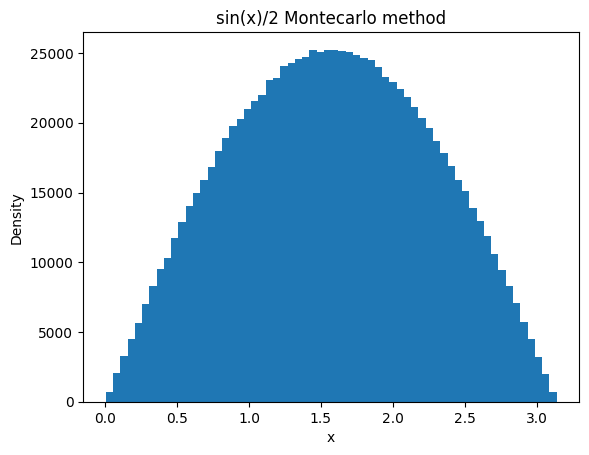

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return np.sin(x)/2



N=157*10**4
#El àrea del rectangle de costat 0.5 i pi es pi/2 i l'àrea dins del sinus és 1
#Si volem que surtin 10**6 punts dins del sinus fem una relació entre els punts
#que surtirien en el rectangle pels que sortiran dins del sinus fent aquesta relació d'àrees
#--> punts_rectangle(perquè surtin 10**6 en el sinus)=pi/2*10^6


x=np.random.uniform(0,np.pi, N)


y=np.random.uniform(0,0.5,N)

x_valid=x[y < f(x)]
y_valid=y[y<f(x)]


plt.hist(x_valid, bins=62)
plt.ylabel("Density")
plt.xlabel("x")
plt.title("sin(x)/2 Montecarlo method")















2) Normalitza aquest histograma, i mostra també l'histograma que has fet a l'apartat "Phython #3" i la funció $f(x)$. Tot en una única gràfica. **[2 punts]**

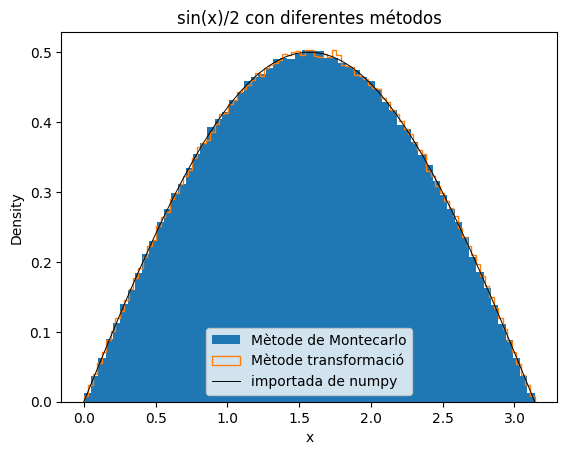

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return np.sin(x)/2
N=157*10**4

x=np.random.uniform(0,np.pi, N)


y=np.random.uniform(0,0.5,N)

x_valid=x[y < f(x)]
y_valid=y[y<f(x)]


plt.hist(x_valid, bins=62, density=True, label="Mètode de Montecarlo")
plt.ylabel("Density")
plt.xlabel("x")
plt.title("sin(x)/2 con diferentes métodos")

def f(x):
  return np.sin(x)/2

def F(x):
  return (1-np.cos(x))/2

x_2=np.linspace(0,np.pi)

u=F(x_2)
u=np.random.uniform(0,1,10**6)
g=np.arccos(1-2*u)

plt.hist(g, bins=100, density=True, histtype="step", lw=2, label="Mètode transformació") #Con este histtype="step" le quito el relleno al histograma
plt.ylabel("Density")
plt.xlabel("x")

x=np.linspace(0, np.pi)
plt.plot(x, f(x), color="k", label="importada de numpy", lw=0.7)

plt.legend()


3) Farem ara el mateix, però ordenant els valors de aleatoris que has generat i fent una gràfica cumulativa en $x$ per resemblar la funció cumulativa $F(x)$. Això es fa així:

*   Ordena de menor a major els teus valors aleatoris que segueixen $f(x)$
*   Crea una altra llista pels valors en $y$ que sigui vagi de 0 a 1 en pasos de $1/N$.
*   Fes la gràfica d'aquests parells de punts, que seguiràn la distribució de probabilitat cumulativa F(x).

Fes un parell de gràfiques, per a cada mètode d'aquesta pràctica, i posa a damunt també $F(x)$. Però genera menys valors per als dos mètodes, diguem-ne N=500 perquè poguem visualitzar millor els resultats! **[4 punts]**


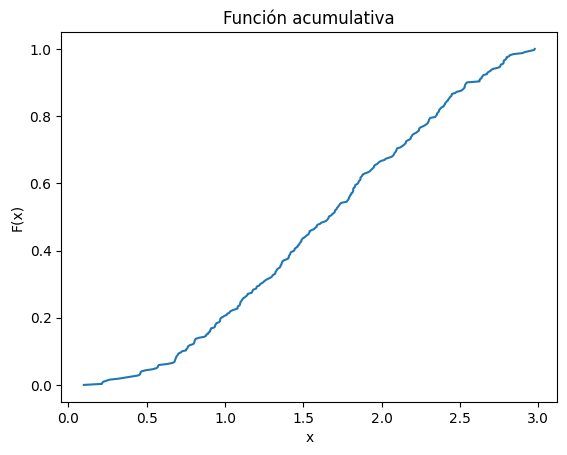

Text(0.5, 0, 'x')

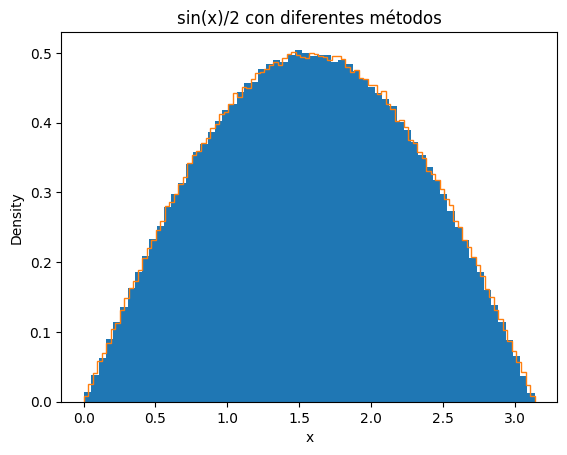

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return np.sin(x)/2



N=500

x=np.random.uniform(0,np.pi, N)


y=np.random.uniform(0,0.5,N)

x_valid=x[y < f(x)]
y_valid=y[y<f(x)]

x_valid_ordenada=sorted(x_valid)

y=np.linspace(0,1,len(x_valid))

plt.plot(x_valid_ordenada,y)
plt.title("Función acumulativa")
plt.ylabel("F(x)")
plt.xlabel("x")
plt.show()

N=157*10**4

x=np.random.uniform(0,np.pi, N)


y=np.random.uniform(0,0.5,N)

x_valid=x[y < f(x)]
y_valid=y[y<f(x)]


plt.hist(x_valid, bins=62, density=True, label="Mètode de Montecarlo")
plt.ylabel("Density")
plt.xlabel("x")
plt.title("sin(x)/2 con diferentes métodos")

def f(x):
  return np.sin(x)/2

def F(x):
  return (1-np.cos(x))/2

x_2=np.linspace(0,np.pi)

u=F(x_2)
u=np.random.uniform(0,1,10**6)
g=np.arccos(1-2*u)

plt.hist(g, bins=100, density=True, histtype="step", lw=2, label="Mètode transformació") #Con este histtype="step" le quito el relleno al histograma
plt.ylabel("Density")
plt.xlabel("x")



<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr3_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr3_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr3_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr3_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>